# 3F3 Random Variables and Random Number Generation Lab

**Engineering Tripos Part II A - EIETL Module Experiment 3F3**

This notebook contains all core mathematics, derivations, and implementations for the random variables and random number generation lab. We focus on the SHORT REPORT questions.

## Objectives
- Understand random variables and functions of random variables
- Study the Jacobian as used with random variables
- Experiment with methods for non-uniform random number generation


## Section 0: Setup and Helper Functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import erfc
import warnings

warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["font.size"] = 10

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
def ksdensity(data, width=0.3, x_axis=None):
    """
    Kernel smoothing density estimator using Gaussian kernel.

    Parameters:
    -----------
    data : array-like
        Data points from which to estimate the density
    width : float
        Bandwidth (sigma) for the Gaussian kernel
    x_axis : array-like, optional
        Points at which to evaluate the density. If None, creates default range

    Returns:
    --------
    x_values : ndarray
        Points at which density was evaluated
    pdf : ndarray
        Estimated probability density at x_values
    """

    if x_axis is None:
        x_axis = np.linspace(np.min(data) - 3 * width, np.max(data) + 3 * width, 200)

    # Gaussian kernel: K(u) = (1/sqrt(2π)) * exp(-u²/2)
    def normal_pdf(x, mu=0.0, sigma=1.0):
        u = (x - mu) / abs(sigma)
        return (1 / (np.sqrt(2 * np.pi) * abs(sigma))) * np.exp(-u * u / 2)

    # Apply kernel to each data point and average
    pdf = np.zeros_like(x_axis, dtype=float)
    for xi, x in enumerate(x_axis):
        # Contribution from each data point using Gaussian kernel
        pdf[xi] = np.mean([normal_pdf(x, mu=d, sigma=width) for d in data])

    return x_axis, pdf


print("ksdensity function defined.")

ksdensity function defined.


## Section 1: Theory Recap - Core Distributions and Concepts

### Key Distributions

**Normal Distribution:**
$$p(x) = \mathcal{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$

**Uniform Distribution:**
$$p(x) = \mathcal{U}(x|a,b) = \begin{cases} \frac{1}{b-a} & a < x < b \\ 0 & \text{otherwise} \end{cases}$$

**Exponential Distribution:**
$$p(x|\mu) = \frac{1}{\mu}\exp(-x/\mu), \quad x \geq 0$$

### Key Concepts

**Cumulative Distribution Function (CDF):**
$$F(x) = \Pr(X \leq x) = \int_{-\infty}^{x} p(x')dx'$$

**Probability Density Function (PDF):**
$$p(x) = \frac{dF(x)}{dx}$$

**Expectation:**
$$\mu = E[X] = \int_{-\infty}^{\infty} x p(x)dx$$

**Variance:**
$$\sigma^2 = E[(X-\mu)^2] = E[X^2] - \mu^2$$

**Expectation of a Function:**
$$E[f(X)] = \int_{-\infty}^{\infty} f(x)p(x)dx$$


### Kernel Density Estimation (KDE)

For $N$ random samples $x^{(i)} \sim p(x)$, the kernel density estimator is:

$$\pi_{KS}(x) = \frac{1}{N}\sum_{i=1}^{N} \frac{1}{\sigma}\mathcal{K}\left(\frac{x - x^{(i)}}{\sigma}\right)$$

where $\mathcal{K}(u) = \mathcal{N}(u|0,1)$ is the Gaussian kernel and $\sigma$ is the bandwidth.

**Advantages:** Smooth estimate, good for visualization  
**Disadvantages:** Bandwidth selection crucial, slow near boundaries

**Histogram advantages:** Shows bin structure, computationally efficient  
**Histogram disadvantages:** Bin edge artifacts, less smooth


## Question 1: Uniform and Normal Random Variables

**Task:** Generate 1000 Gaussian and 1000 uniform random numbers, plot histograms overlaid with theoretical PDFs and KDE estimates.

In [4]:
# Generate random samples
N = 1000

# Gaussian: N(0, 1)
x_normal = np.random.randn(N)

# Uniform: U(0, 1)
x_uniform = np.random.rand(N)

print(
    f"Generated {N} normal samples: mean={x_normal.mean():.4f}, std={x_normal.std():.4f}"
)
print(
    f"Generated {N} uniform samples: mean={x_uniform.mean():.4f}, std={x_uniform.std():.4f}"
)

Generated 1000 normal samples: mean=0.0193, std=0.9787
Generated 1000 uniform samples: mean=0.5036, std=0.2882


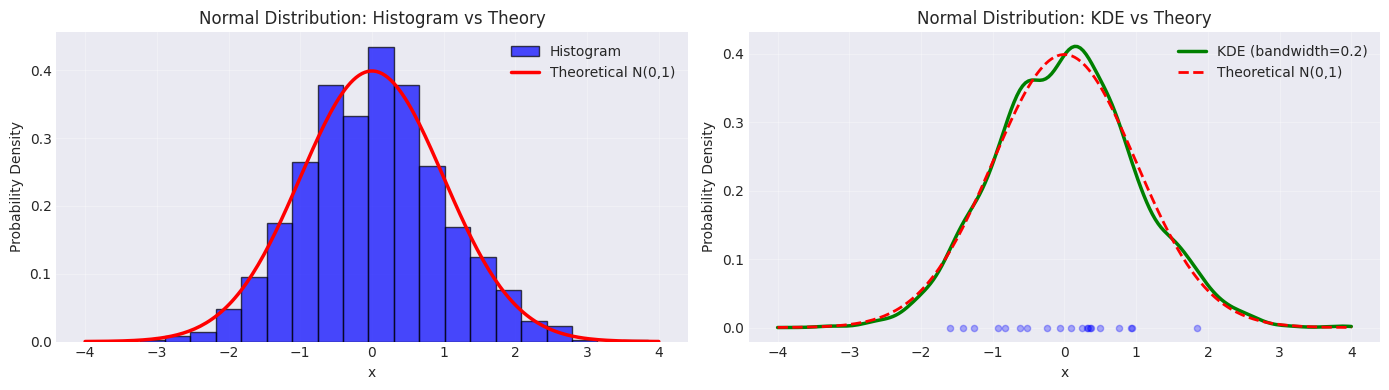

✓ Normal distribution plotted


In [5]:
# Plot 1: NORMAL DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_normal,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory = np.linspace(-4, 4, 200)
p_theory = stats.norm.pdf(x_theory, loc=0, scale=1)
ax.plot(x_theory, p_theory, "r-", linewidth=2.5, label="Theoretical N(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

# Kernel Density Estimation
ax = axes[1]
x_kde, pdf_kde = ksdensity(x_normal, width=0.2, x_axis=x_theory)
ax.plot(x_kde, pdf_kde, "g-", linewidth=2.5, label="KDE (bandwidth=0.2)")
ax.plot(x_theory, p_theory, "r--", linewidth=2, label="Theoretical N(0,1)")
ax.scatter(x_normal[::50], np.zeros(len(x_normal[::50])), alpha=0.3, s=20, color="blue")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Normal Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Normal distribution plotted")

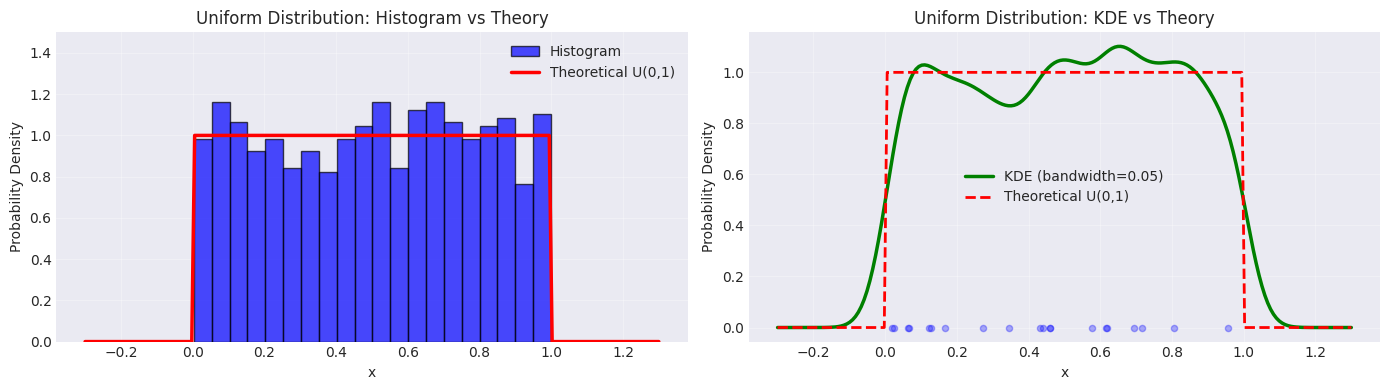

✓ Uniform distribution plotted


In [6]:
# Plot 2: UNIFORM DISTRIBUTION
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Histogram
ax = axes[0]
counts, bins, patches = ax.hist(
    x_uniform,
    bins=20,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Histogram",
)

# Overlay theoretical PDF
x_theory_u = np.linspace(-0.3, 1.3, 200)
p_theory_u = stats.uniform.pdf(x_theory_u, loc=0, scale=1)
ax.plot(x_theory_u, p_theory_u, "r-", linewidth=2.5, label="Theoretical U(0,1)")

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: Histogram vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.5])

# Kernel Density Estimation
ax = axes[1]
x_kde_u, pdf_kde_u = ksdensity(x_uniform, width=0.05, x_axis=x_theory_u)
ax.plot(x_kde_u, pdf_kde_u, "g-", linewidth=2.5, label="KDE (bandwidth=0.05)")
ax.plot(x_theory_u, p_theory_u, "r--", linewidth=2, label="Theoretical U(0,1)")
ax.scatter(
    x_uniform[::50], np.zeros(len(x_uniform[::50])), alpha=0.3, s=20, color="blue"
)

ax.set_xlabel("x")
ax.set_ylabel("Probability Density")
ax.set_title("Uniform Distribution: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Uniform distribution plotted")

### Q1 Analysis: KDE vs Histogram Methods

**Histogram Advantages:**
- Simple to understand and compute
- Direct visualization of bin counts
- Computationally efficient for large datasets

**Histogram Disadvantages:**
- Artificial bin edges create discontinuities
- Bin width selection affects appearance significantly
- Loses information about sample locations within bins

**KDE Advantages:**
- Smooth, continuous estimate
- Better for estimating true underlying density
- No artificial discontinuities
- Better for overlaying with theoretical PDFs

**KDE Disadvantages:**
- Bandwidth selection is crucial (too small → noisy, too large → over-smoothed)
- Computationally slower (O(N²) naively)
- Boundary effects at distribution limits
- More difficult to interpret for statistical testing


## Question 2: Functions of Random Variables and the Jacobian

**Key Theorem:** If $x \sim p(x)$ and $y = f(x)$ with inverse $x = f^{-1}(y)$, then:

$$p(y) = p(x) \left|\frac{dx}{dy}\right|_{x=f^{-1}(y)} = \frac{p(f^{-1}(y))}{\left|\frac{dy}{dx}\right|_{x=f^{-1}(y)}}$$

For **multiple inverses** $x_1(y), x_2(y), \ldots, x_K(y)$:

$$p(y) = \sum_{k=1}^{K} \frac{p(x_k(y))}{\left|\frac{dy}{dx}\right|_{x=x_k(y)}}$$


### Example 2a: Linear Transformation $y = ax + b$

**Derivation:** Start with $x \sim \mathcal{N}(0, 1)$

Given: $y = ax + b$

Then: $x = \frac{y - b}{a}$ (single inverse)

Jacobian: $\frac{dy}{dx} = a$, so $\left|\frac{dx}{dy}\right| = \frac{1}{|a|}$

$$p(y) = p(x)\left|\frac{dx}{dy}\right| = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}\left(\frac{y-b}{a}\right)^2\right) \cdot \frac{1}{|a|}$$

$$p(y) = \frac{1}{\sqrt{2\pi a^2}}\exp\left(-\frac{(y-b)^2}{2a^2}\right) = \mathcal{N}(y | b, a^2)$$

**Result:** Linear transformation of $\mathcal{N}(0,1)$ gives $\mathcal{N}(b, a^2)$ ✓



Linear Transformation: y = 3.0*x + 5.0
Expected: μ = 5.0, σ² = 9.0
Observed: μ = 4.9257, σ² = 9.0397


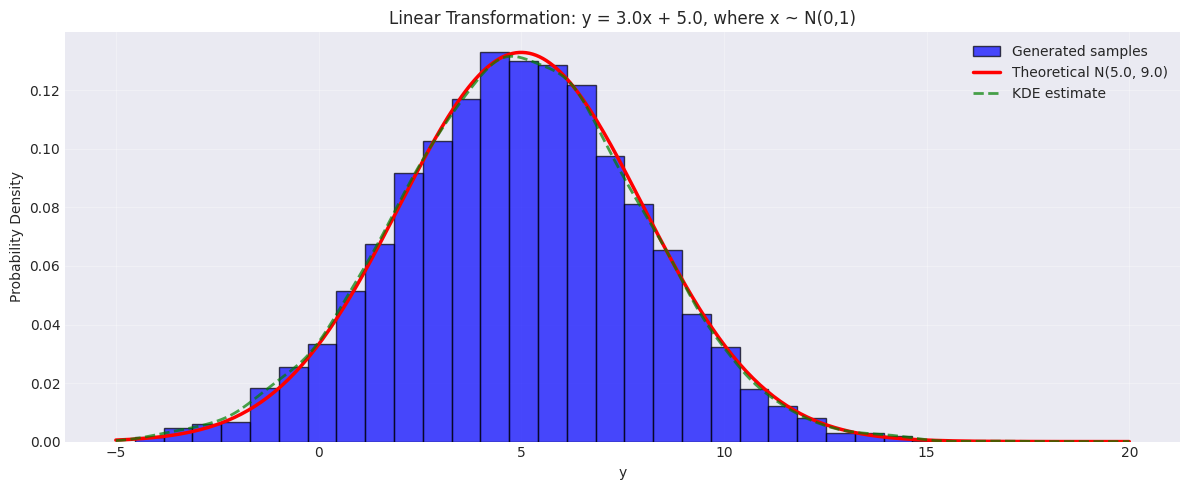

✓ Linear transformation verified


In [7]:
# Example 2a: Linear transformation y = ax + b
# Start with x ~ N(0, 1)

a = 3.0
b = 5.0

# Generate and transform
N_samples = 5000
x = np.random.randn(N_samples)
y = a * x + b  # y should be ~ N(b, a²) = N(5, 9)

# Theoretical distribution
mu_theory = b
sigma_theory = a

print(f"\nLinear Transformation: y = {a}*x + {b}")
print(f"Expected: μ = {mu_theory}, σ² = {sigma_theory**2}")
print(f"Observed: μ = {y.mean():.4f}, σ² = {y.std() ** 2:.4f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram
counts, bins, patches = ax.hist(
    y,
    bins=30,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples",
)

# Theoretical PDF
x_range = np.linspace(-5, 20, 300)
p_theory = stats.norm.pdf(x_range, loc=mu_theory, scale=sigma_theory)
ax.plot(
    x_range,
    p_theory,
    "r-",
    linewidth=2.5,
    label=f"Theoretical N({mu_theory}, {sigma_theory**2})",
)

# KDE
x_kde, pdf_kde = ksdensity(y, width=0.5, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title(f"Linear Transformation: y = {a}x + {b}, where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Linear transformation verified")

### Example 2b: Quadratic Transformation $y = x^2$

**Derivation:** Start with $x \sim \mathcal{N}(0, 1)$

Given: $y = x^2$ (restricted to $y \geq 0$)

**Two possible inverses:** $x_1(y) = \sqrt{y}$ and $x_2(y) = -\sqrt{y}$

Jacobian: $\frac{dy}{dx} = 2x$, so $\left|\frac{dx}{dy}\right| = \frac{1}{2|x|} = \frac{1}{2\sqrt{y}}$

$$p(y) = \sum_{k=1}^{2} \frac{p(x_k(y))}{\left|\frac{dy}{dx}\right|_{x=x_k(y)}}$$

$$p(y) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}} + \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{y}{2}\right) \cdot \frac{1}{2\sqrt{y}}$$

$$p(y) = \frac{1}{\sqrt{2\pi y}}\exp\left(-\frac{y}{2}\right), \quad y \geq 0$$

**Result:** This is a chi-squared distribution with 1 degree of freedom! ✓



Quadratic Transformation: y = x²
Expected: χ²(1) distribution
Expected mean = 1, variance = 2
Observed: mean = 1.0059, variance = 2.1084


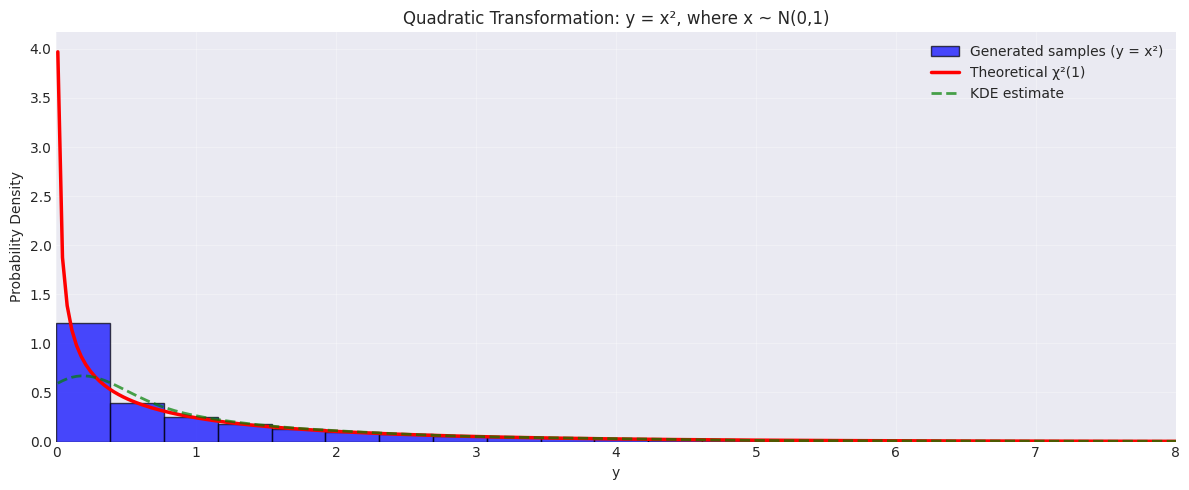

✓ Quadratic transformation verified


In [8]:
# Example 2b: Quadratic transformation y = x²
# Start with x ~ N(0, 1)

N_samples = 5000
x = np.random.randn(N_samples)
y = x**2  # y should be ~ χ²(1) = chi-squared with 1 degree of freedom

# Theoretical distribution: chi-squared with 1 df
# p(y) = (1/√(2πy)) * exp(-y/2)

print(f"\nQuadratic Transformation: y = x²")
print(f"Expected: χ²(1) distribution")
print(f"Expected mean = 1, variance = 2")
print(f"Observed: mean = {y.mean():.4f}, variance = {y.var():.4f}")

# Plot
fig, ax = plt.subplots(figsize=(12, 5))

# Histogram (only positive y)
y_positive = y[y > 0]
counts, bins, patches = ax.hist(
    y_positive,
    bins=40,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples (y = x²)",
)

# Theoretical PDF: chi-squared with 1 df
x_range = np.linspace(0.01, 10, 300)
p_theory = stats.chi2.pdf(x_range, df=1)
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical χ²(1)")

# KDE
x_kde, pdf_kde = ksdensity(y_positive, width=0.3, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g--", linewidth=2, alpha=0.7, label="KDE estimate")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Quadratic Transformation: y = x², where x ~ N(0,1)")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

print("✓ Quadratic transformation verified")

## Question 3: Inverse CDF Method for Non-uniform Random Number Generation

### Theory

**Key Insight:** If $U \sim \mathcal{U}(0,1)$ and we define $Y = F^{-1}(U)$ where $F$ is any CDF, then $Y$ has the distribution with CDF $F$.

**Proof:** For $u \in (0,1)$:
$$\Pr(Y \leq y) = \Pr(F^{-1}(U) \leq y) = \Pr(U \leq F(y)) = F(y)$$

where the last step uses that $U$ is uniform on $(0,1)$.

**Algorithm:**
1. Generate $u^{(i)} \sim \mathcal{U}(0,1)$
2. Compute $y^{(i)} = F^{-1}(u^{(i)})$
3. Then $y^{(i)} \sim p(y)$ where $p(y) = \frac{d}{dy}F(y)$


### Exponential Distribution: Deriving the Inverse CDF

**Given:** $p(y) = \exp(-y)$ for $y \geq 0$ (mean = 1)

**Step 1: Find CDF**
$$F(y) = \int_0^y \exp(-t) dt = [-\exp(-t)]_0^y = 1 - \exp(-y)$$

**Step 2: Find inverse CDF**
Set $u = F(y) = 1 - \exp(-y)$

$$u = 1 - \exp(-y)$$
$$\exp(-y) = 1 - u$$
$$-y = \ln(1-u)$$
$$y = -\ln(1-u)$$

**Alternative form** (since $1-U$ is also uniform when $U \sim \mathcal{U}(0,1)$):
$$y = -\ln(u)$$

**Result:** Generate exponential by: $y^{(i)} = -\ln(u^{(i)})$ where $u^{(i)} \sim \mathcal{U}(0,1)$ ✓



Exponential Distribution (mean = 1.0)
Expected: mean = 1.0, variance = 1.0
Observed: mean = 0.9759, variance = 0.9796


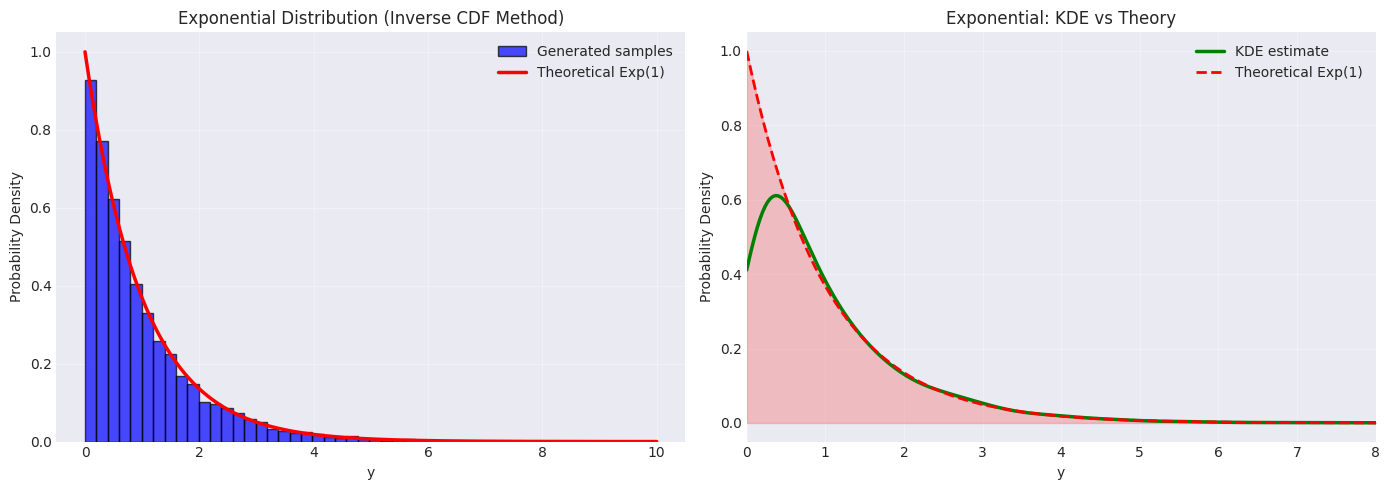

✓ Exponential distribution generated successfully via inverse CDF


In [9]:
# Question 3: Inverse CDF Method for Exponential Distribution


def generate_exponential(n_samples, mean=1.0):
    """
    Generate exponential random variates using inverse CDF method.

    For exponential with mean μ:
    p(y) = (1/μ) * exp(-y/μ)
    CDF: F(y) = 1 - exp(-y/μ)
    Inverse CDF: F⁻¹(u) = -μ * ln(u)
    """
    u = np.random.rand(n_samples)  # U(0,1)
    y = -mean * np.log(u)  # Apply inverse CDF
    return y


# Generate samples
N_exp = 10000
y_exp = generate_exponential(N_exp, mean=1.0)

print(f"\nExponential Distribution (mean = 1.0)")
print(f"Expected: mean = 1.0, variance = 1.0")
print(f"Observed: mean = {y_exp.mean():.4f}, variance = {y_exp.var():.4f}")

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Standard histogram with theory
ax = axes[0]
counts, bins, patches = ax.hist(
    y_exp,
    bins=50,
    density=True,
    alpha=0.7,
    color="blue",
    edgecolor="black",
    label="Generated samples",
)

# Theoretical PDF
x_range = np.linspace(0, 10, 300)
p_theory = stats.expon.pdf(x_range, scale=1.0)  # scale = mean
ax.plot(x_range, p_theory, "r-", linewidth=2.5, label="Theoretical Exp(1)")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Exponential Distribution (Inverse CDF Method)")
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: KDE comparison
ax = axes[1]
x_kde, pdf_kde = ksdensity(y_exp, width=0.3, x_axis=x_range)
ax.plot(x_kde, pdf_kde, "g-", linewidth=2.5, label="KDE estimate")
ax.plot(x_range, p_theory, "r--", linewidth=2, label="Theoretical Exp(1)")
ax.fill_between(x_range, p_theory, alpha=0.2, color="red")

ax.set_xlabel("y")
ax.set_ylabel("Probability Density")
ax.set_title("Exponential: KDE vs Theory")
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_xlim([0, 8])

plt.tight_layout()
plt.show()

print("✓ Exponential distribution generated successfully via inverse CDF")

## Question 4: α-Stable Distribution (Heavy-Tailed Random Variables)

**Application:** Communications, signal processing, modeling interference noise that deviates from Gaussian assumptions.

### Generation Recipe

To generate from the α-stable distribution:

**(a)** Choose parameters $\alpha \in (0,2), \alpha \neq 1$ and $\beta \in [-1,+1]$, calculate:
$$b = \frac{1}{\alpha}\tan^{-1}\left(\beta\tan\frac{\pi\alpha}{2}\right)$$
$$s = \left(1 + \beta^2\tan^2\frac{\pi\alpha}{2}\right)^{1/(2\alpha)}$$

**(b)** Generate $U \sim \mathcal{U}(-\pi/2, +\pi/2)$

**(c)** Generate $V \sim \mathcal{E}(1)$ (exponential with mean 1)

**(d)** Calculate:
$$X = s \frac{\sin(\alpha(U + b))}{(\cos(U))^{1/\alpha}}\left(\frac{\cos(U - \alpha(U + b))}{V}\right)^{(1-\alpha)/\alpha}$$

**(e)** Then $X$ follows the α-stable distribution.

### Parameter Interpretation

- **α (stability parameter):** Controls tail heaviness
  - α → 2: Approaches Gaussian distribution (lightest tails)
  - α = 1: Cauchy distribution
  - α → 0: Increasingly heavy tails
  
- **β (skewness parameter):** Controls asymmetry
  - β = 0: Symmetric distribution
  - β > 0: Skewed right
  - β < 0: Skewed left


In [10]:
def generate_stable(alpha, beta, n_samples):
    """
    Generate α-stable random variates using the recipe method.

    Parameters:
    -----------
    alpha : float
        Stability parameter, α ∈ (0, 2), α ≠ 1
    beta : float
        Skewness parameter, β ∈ [-1, 1]
    n_samples : int
        Number of samples to generate

    Returns:
    --------
    X : ndarray
        Generated α-stable random variates
    """

    # Calculate constants from parameters
    b = (1 / alpha) * np.arctan(beta * np.tan(np.pi * alpha / 2))
    s = (1 + beta**2 * np.tan(np.pi * alpha / 2) ** 2) ** (1 / (2 * alpha))

    # Generate uniform U(-π/2, π/2)
    U = np.random.uniform(-np.pi / 2, np.pi / 2, n_samples)

    # Generate exponential with mean 1
    V = -np.log(np.random.rand(n_samples))

    # Apply the transformation formula
    numerator = np.sin(alpha * (U + b))
    denominator = (np.cos(U)) ** (1 / alpha)

    base = (np.cos(U - alpha * (U + b)) / V) ** ((1 - alpha) / alpha)

    X = s * (numerator / denominator) * base

    return X


print("α-Stable distribution generator defined.")

α-Stable distribution generator defined.


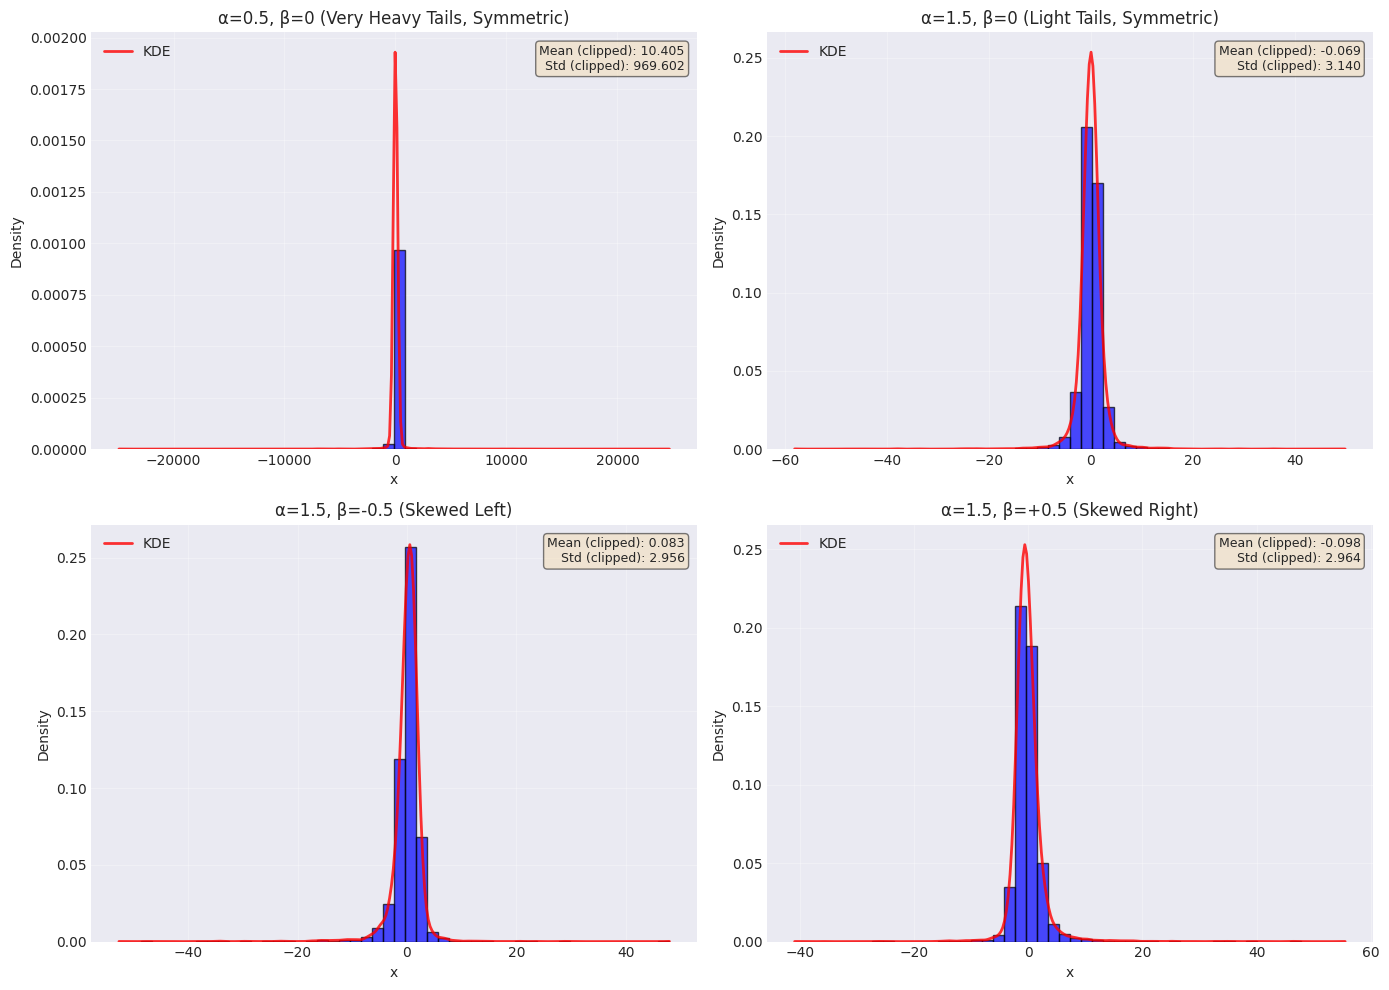

✓ α-stable distributions generated and plotted


In [11]:
# Generate α-stable samples with different parameters

n_samples = 10000

# Test cases
test_cases = [
    (0.5, 0, "α=0.5, β=0 (Very Heavy Tails, Symmetric)"),
    (1.5, 0, "α=1.5, β=0 (Light Tails, Symmetric)"),
    (1.5, -0.5, "α=1.5, β=-0.5 (Skewed Left)"),
    (1.5, 0.5, "α=1.5, β=+0.5 (Skewed Right)"),
]

# Generate and plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (alpha, beta, title) in enumerate(test_cases):
    X = generate_stable(alpha, beta, n_samples)

    ax = axes[idx]

    # For visualization, clip extreme outliers to see the main distribution
    # but count all values
    q99 = np.percentile(np.abs(X), 99)
    X_clipped = X[(X > -5 * q99) & (X < 5 * q99)]

    # Histogram
    ax.hist(
        X_clipped, bins=50, density=True, alpha=0.7, color="blue", edgecolor="black"
    )

    # KDE
    x_range = np.linspace(np.min(X_clipped), np.max(X_clipped), 300)
    x_kde, pdf_kde = ksdensity(X_clipped, width=np.std(X_clipped) * 0.2, x_axis=x_range)
    ax.plot(x_kde, pdf_kde, "r-", linewidth=2, alpha=0.8, label="KDE")

    # Statistics
    mean_val = np.mean(X_clipped)
    std_val = np.std(X_clipped)

    ax.set_xlabel("x")
    ax.set_ylabel("Density")
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    ax.legend()

    # Add text with stats
    stats_text = f"Mean (clipped): {mean_val:.3f}\nStd (clipped): {std_val:.3f}"
    ax.text(
        0.98,
        0.97,
        stats_text,
        transform=ax.transAxes,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5),
        fontsize=9,
    )

plt.tight_layout()
plt.show()

print("✓ α-stable distributions generated and plotted")

### Q4 Analysis: Parameter Interpretation

**α-Stability Parameter (α):**
- **α = 0.5**: Very heavy tails, infinite variance, finite mean
- **α = 1.5**: Lighter tails than α=0.5, but still heavier than Gaussian
- **α → 2.0**: Approaches normal distribution with finite variance

**β-Skewness Parameter (β):**
- **β = 0**: Symmetric distribution
- **β = ±0.5**: Moderate skewness
- **β = ±1.0**: Maximum skewness

**Practical Interpretation:**
- α-stable distributions model phenomena with occasional large outliers
- Higher α → better for normal-like data with light tails
- Lower α → necessary for data with occasional extreme events
- β allows fitting skewed noise in communications and signal processing


## Summary: Key Formulas and Methods

### Method 1: Jacobian Transformation
For $y = f(x)$ with known $p(x)$:
$$p(y) = \sum_{k} p(x_k(y))\left|\frac{dx}{dy}\right|_{x=x_k(y)}$$

**When to use:** When you have an invertible transformation of known distributions.

### Method 2: Inverse CDF
Generate $u \sim \mathcal{U}(0,1)$, then compute $y = F^{-1}(u)$
$$y \sim p(y) = \frac{d}{dy}F(y)$$

**When to use:** When CDF is known and invertible (exponential, uniform, Weibull, etc.)

### Method 3: Recipe-Based Generation
Use problem-specific transformation formula (e.g., α-stable using U and V)

**When to use:** When distribution has no closed-form PDF or CDF (α-stable, some distributions in signal processing)

### Verification Strategy
1. Generate large number of samples ($N \geq 1000$)
2. Create histogram with appropriate bins
3. Overlay theoretical PDF
4. Compare KDE estimate with theory
5. Check mean and variance match expected values


In [12]:
# Verification Summary Table
import pandas as pd

summary_data = {
    "Question": ["Q1", "Q2a", "Q2b", "Q3", "Q4"],
    "Topic": [
        "Histogram & KDE",
        "Linear Transform",
        "Quadratic Transform",
        "Inverse CDF",
        "α-Stable",
    ],
    "Method": ["Sampling", "Jacobian", "Jacobian", "Inverse CDF", "Recipe"],
    "Key Formula": [
        "π_KS(x) = (1/N)Σ K((x-x^(i))/σ)",
        "p(y) = (1/|a|) * N((y-b)/a|0,1)",
        "p(y) = (1/√(2πy)) * exp(-y/2)",
        "y = F⁻¹(u) = -ln(1-u)",
        "X = s * sin(α(U+b))/(cos(U))^(1/α) * ...",
    ],
}

df_summary = pd.DataFrame(summary_data)
print("\n" + "=" * 100)
print("SUMMARY OF QUESTIONS AND METHODS")
print("=" * 100)
print(df_summary.to_string(index=False))
print("=" * 100)


SUMMARY OF QUESTIONS AND METHODS
Question               Topic      Method                              Key Formula
      Q1     Histogram & KDE    Sampling          π_KS(x) = (1/N)Σ K((x-x^(i))/σ)
     Q2a    Linear Transform    Jacobian          p(y) = (1/|a|) * N((y-b)/a|0,1)
     Q2b Quadratic Transform    Jacobian            p(y) = (1/√(2πy)) * exp(-y/2)
      Q3         Inverse CDF Inverse CDF                    y = F⁻¹(u) = -ln(1-u)
      Q4            α-Stable      Recipe X = s * sin(α(U+b))/(cos(U))^(1/α) * ...
